The clinical dataset was collected from the Internal Medicine Outpatient Clinic of Ankara VM Medical Park Hospital and includes data from 319 individuals (June 2022–June 2023), 161 of whom were diagnosed with gallstone disease. It contains 38 features, including demographic, bioimpedance, and laboratory data, and was ethically approved by the Ankara City Hospital Ethics Committee (E2-23-4632). Demographic variables are age, sex, height, weight, and BMI. Bioimpedance data includes total, extracellular, and intracellular water, muscle and fat mass, protein, visceral fat area, and hepatic fat. Laboratory features are glucose, total cholesterol, HDL, LDL, triglycerides, AST, ALT, ALP, creatinine, GFR, CRP, hemoglobin, and vitamin D. The dataset is complete, with no missing values, and balanced in terms of disease status, eliminating the need for additional preprocessing. It provides a strong foundation for machine learning-based gallstone prediction using non-imaging features.

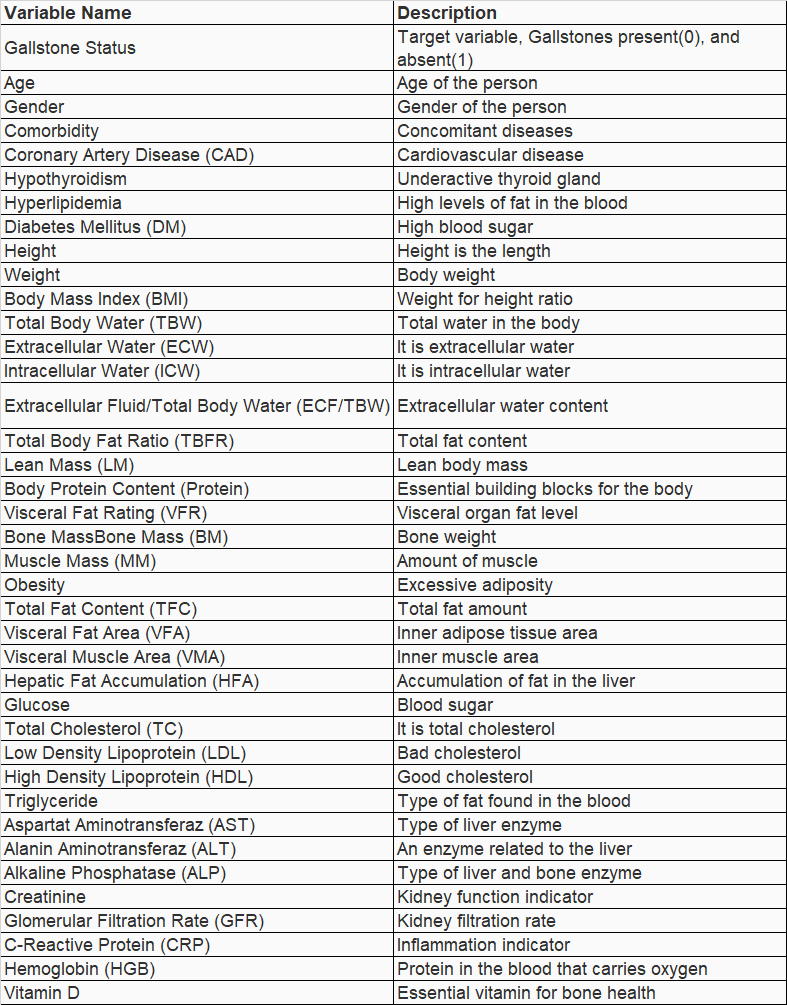

In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gallstone.csv')

In [3]:
df.shape

(319, 39)

In [4]:
df.columns

Index(['Gallstone Status', 'Age', 'Gender', 'Comorbidity',
       'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia',
       'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)',
       'Total Body Water (TBW)', 'Extracellular Water (ECW)',
       'Intracellular Water (ICW)',
       'Extracellular Fluid/Total Body Water (ECF/TBW)',
       'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)',
       'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)',
       'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)',
       'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)',
       'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)',
       'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)',
       'High Density Lipoprotein (HDL)', 'Triglyceride',
       'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)',
       'Alkaline Phosphatase (ALP)', 'Creatinine',
       'Glomerular Filtration Rate (GFR

In [5]:
df.head(3)

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [7]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [8]:
df['Gallstone Status'].value_counts()

,count
Gallstone Status,
0,161
1,158


In [9]:
df.groupby('Gallstone Status').mean()

,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Gallstone Status,,,,,,,,,,,,,,,,,,,,,
0,47.633540,0.416149,0.360248,0.055901,0.037267,0.000000,0.099379,168.229814,79.808696,28.238509,...,46.695652,149.424783,23.913043,28.012422,70.484472,0.823696,101.293545,0.462174,14.763975,24.904969
1,48.512658,0.569620,0.310127,0.018987,0.018987,0.050633,0.170886,166.063291,81.335443,29.527848,...,52.308228,139.486076,19.414557,25.677215,75.790506,0.777089,100.335249,3.271962,14.065823,17.831329


EDA

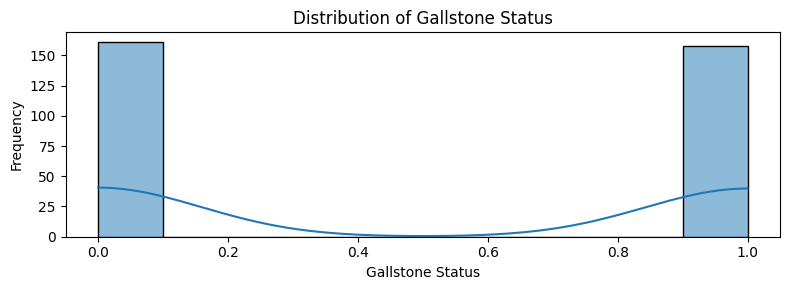

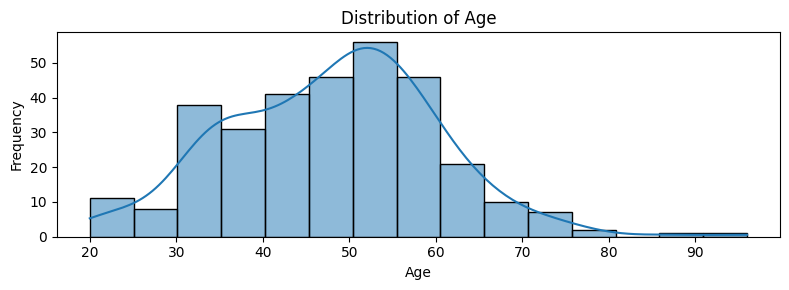

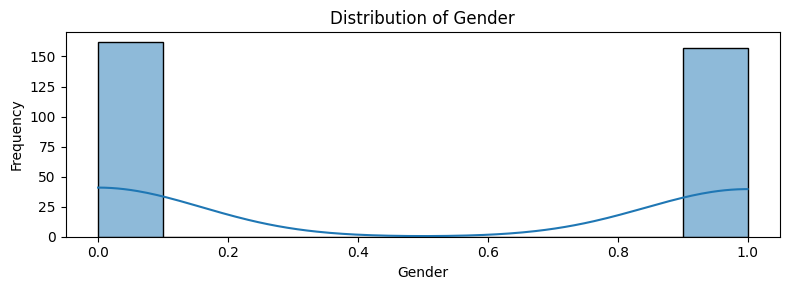

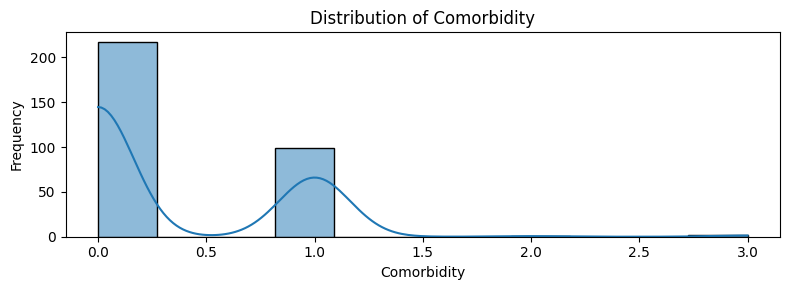

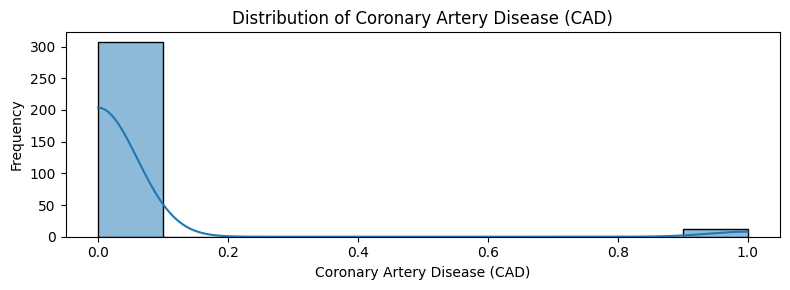

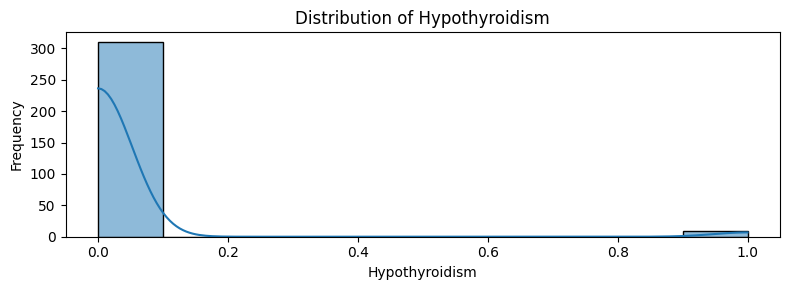

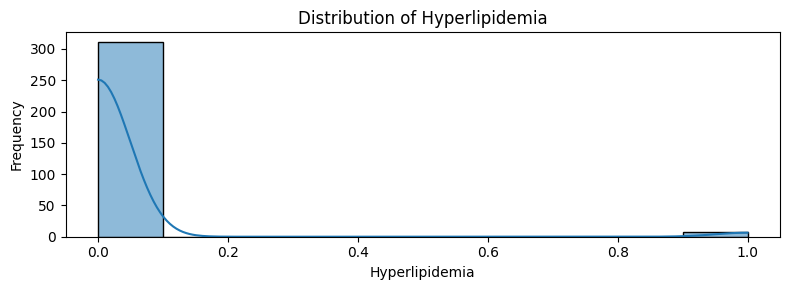

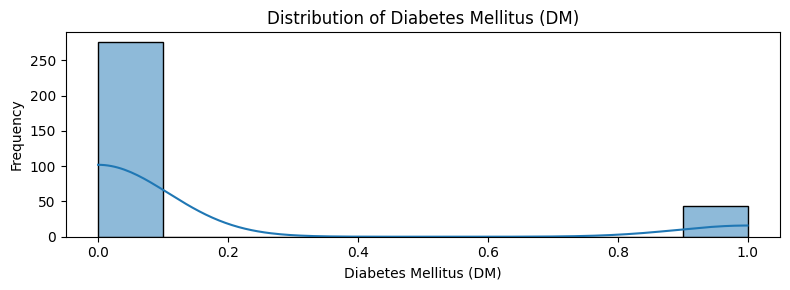

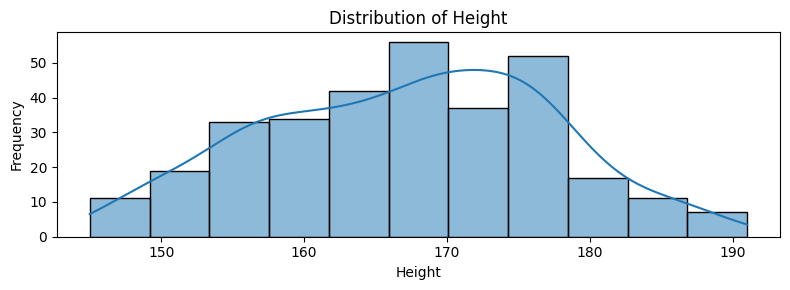

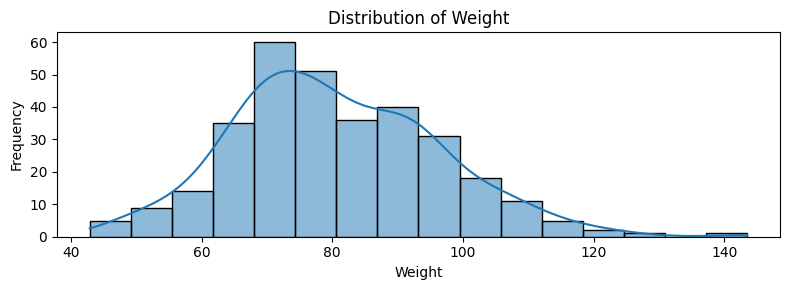

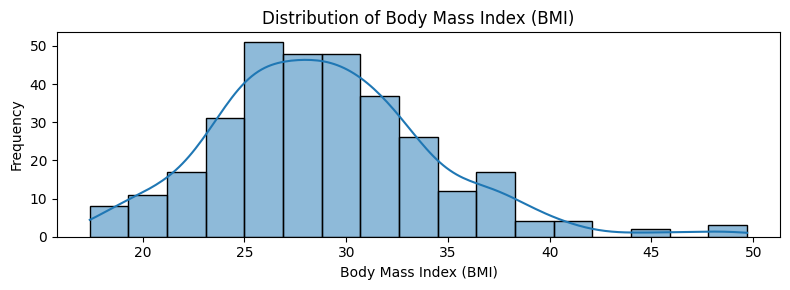

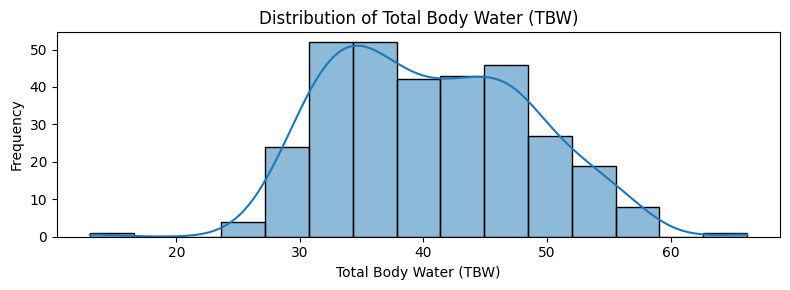

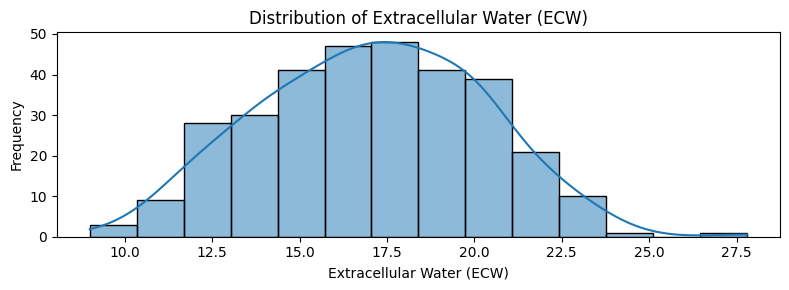

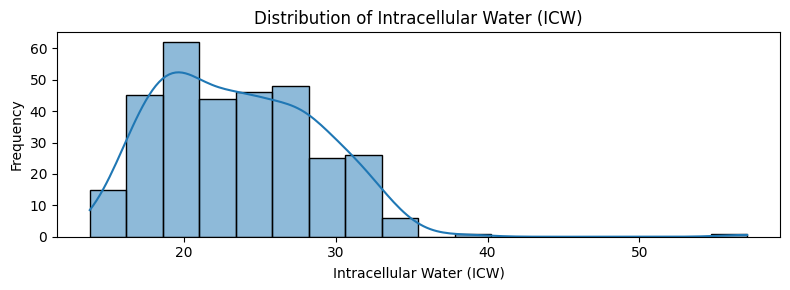

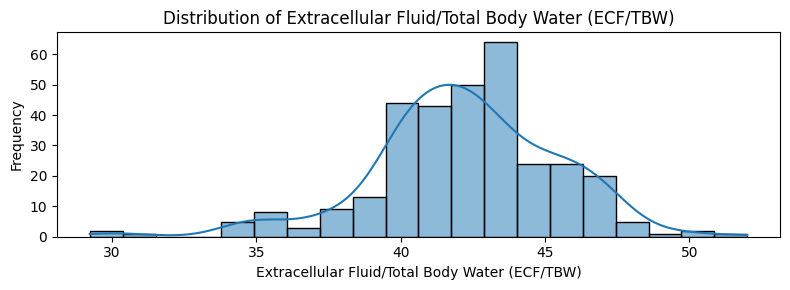

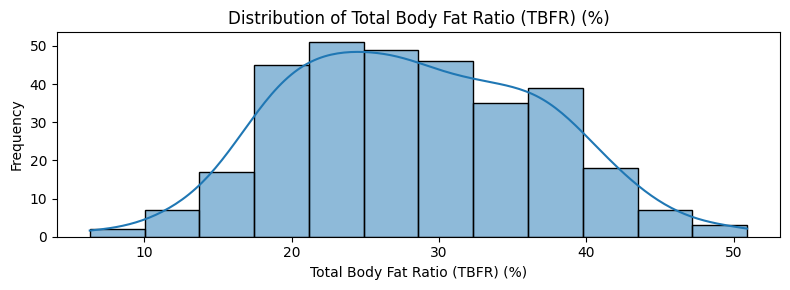

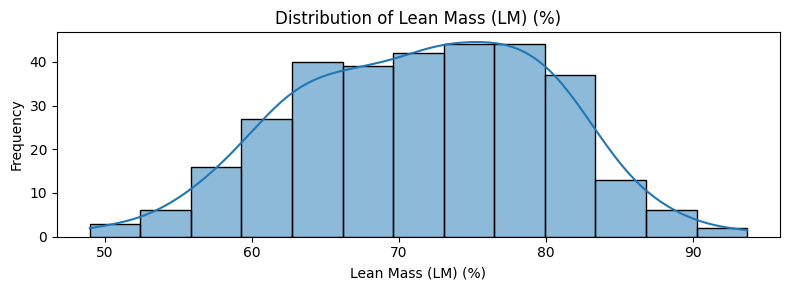

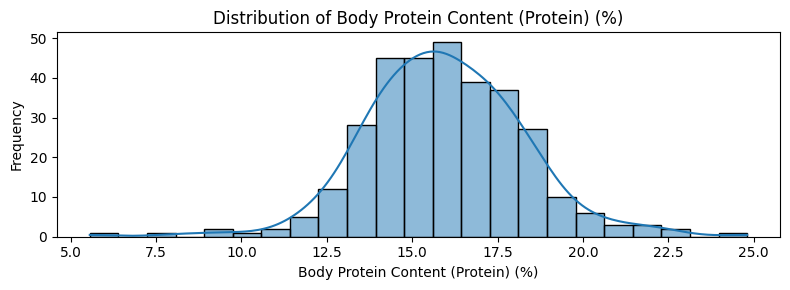

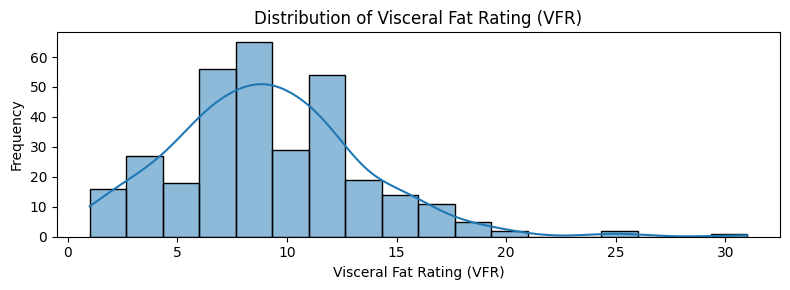

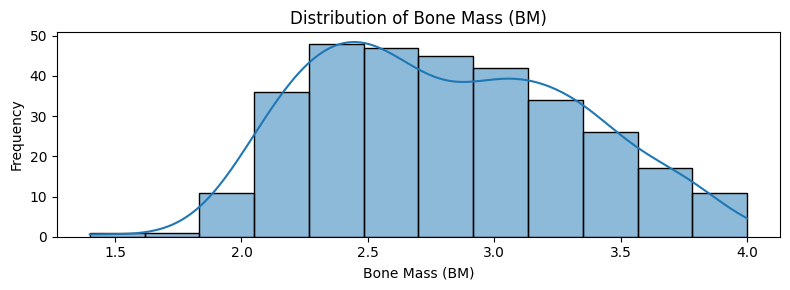

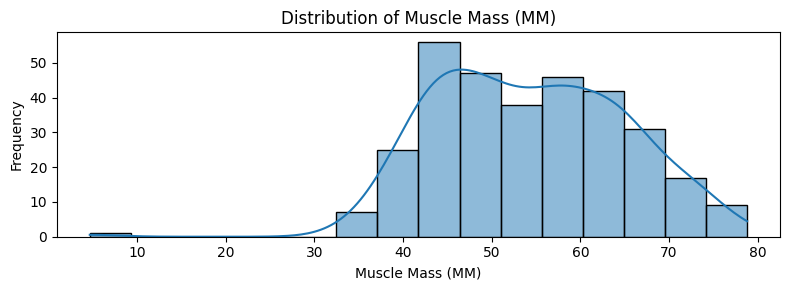

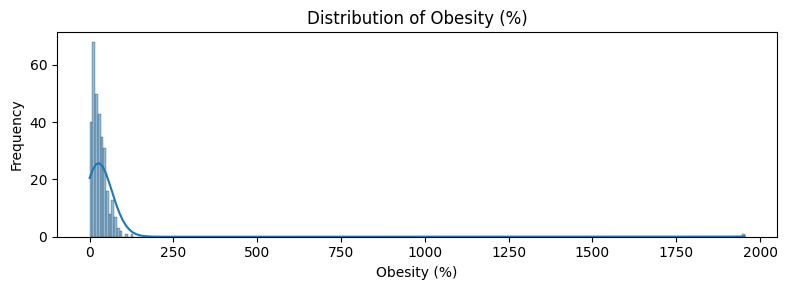

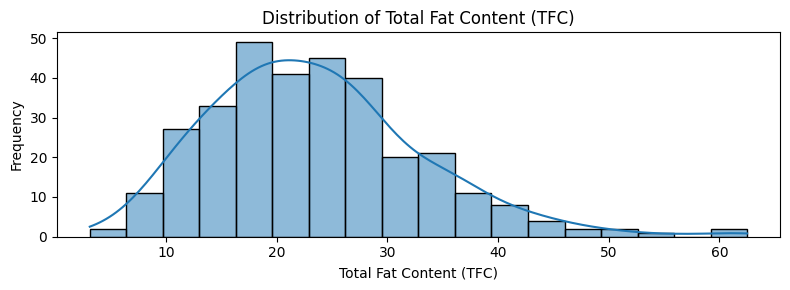

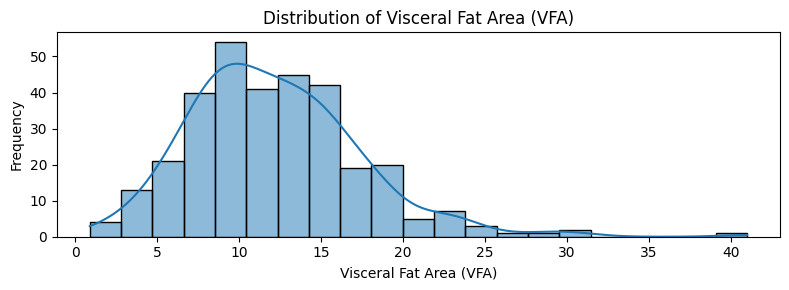

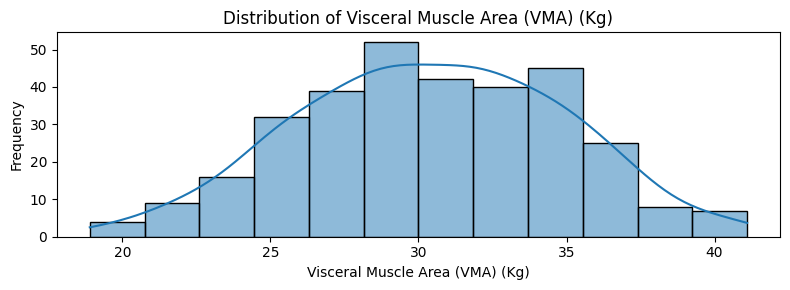

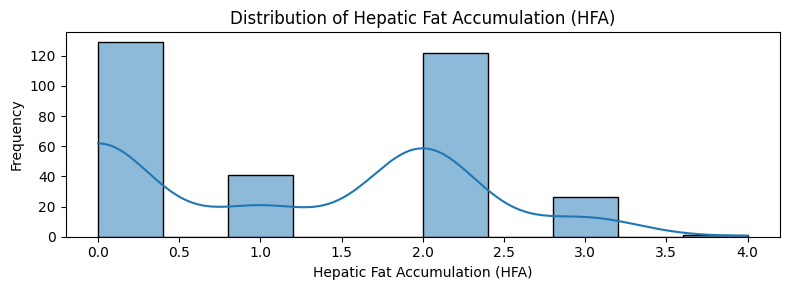

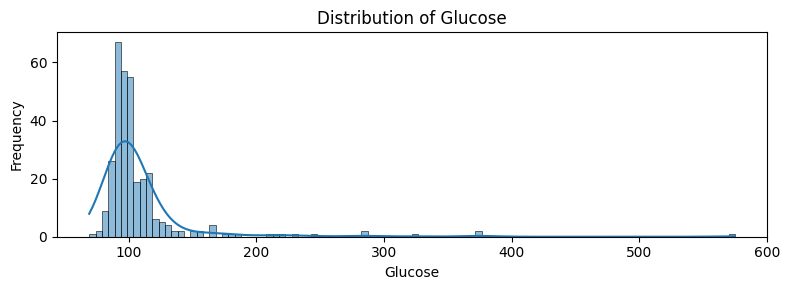

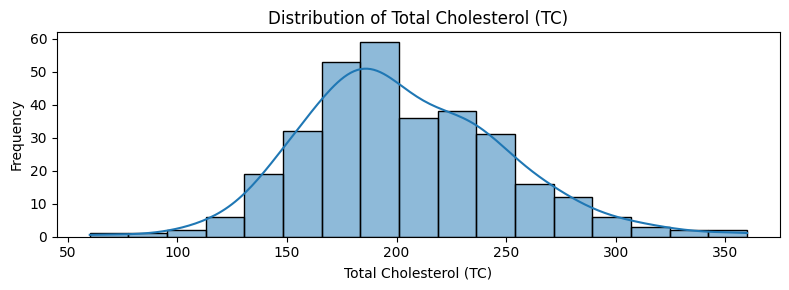

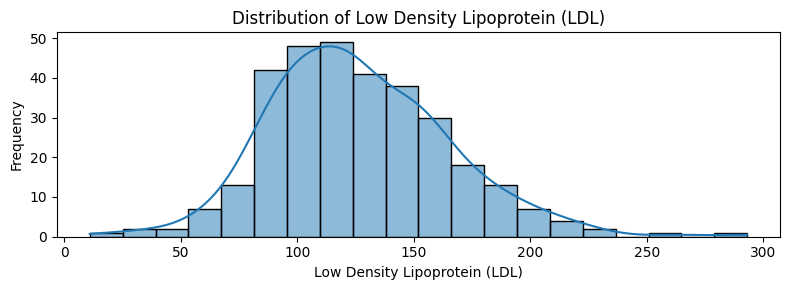

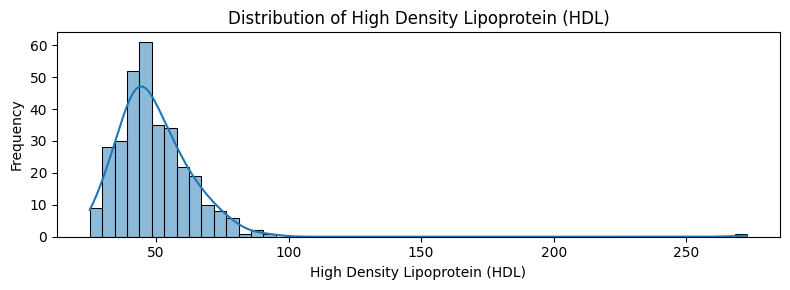

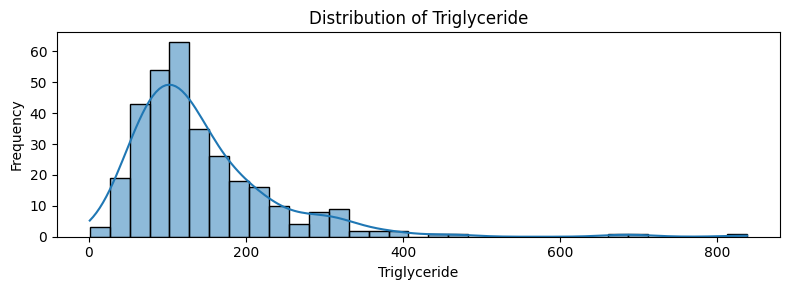

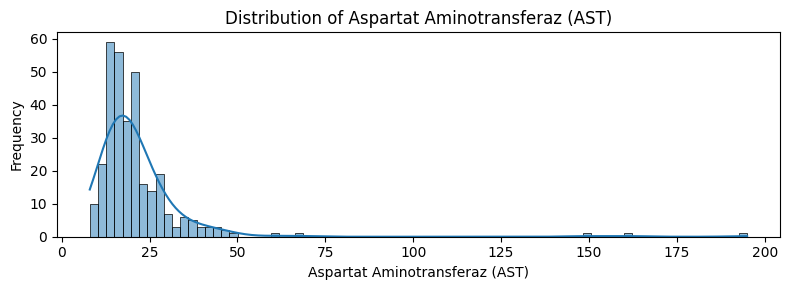

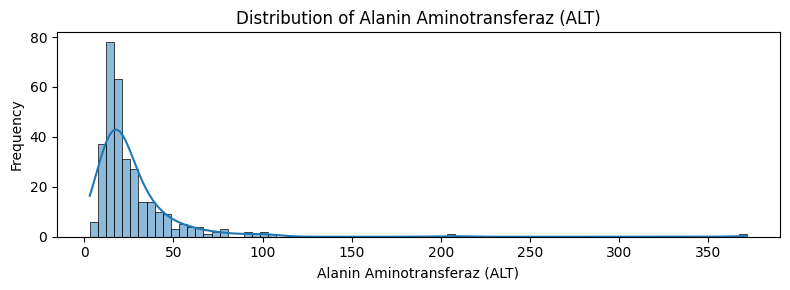

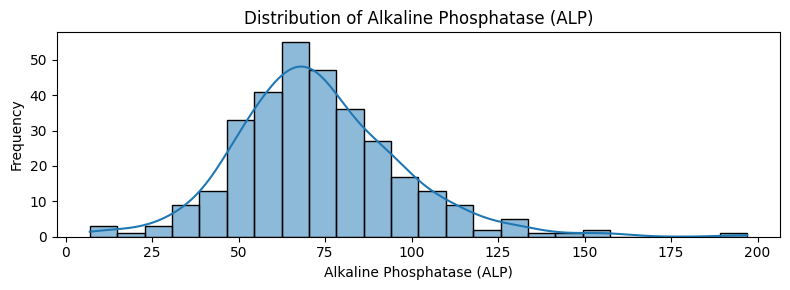

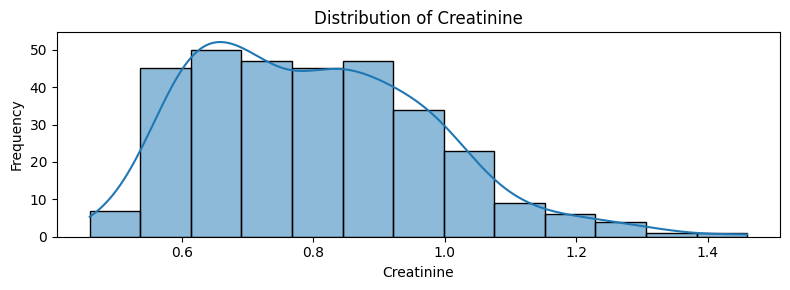

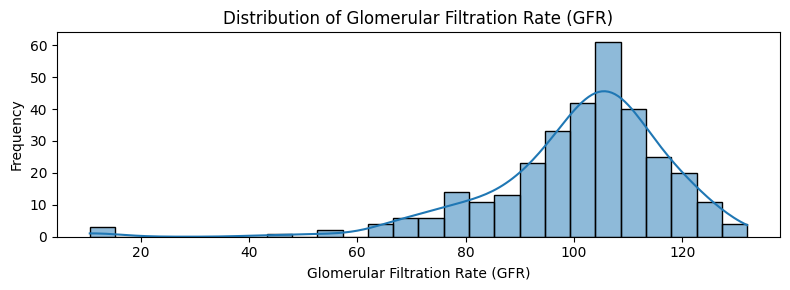

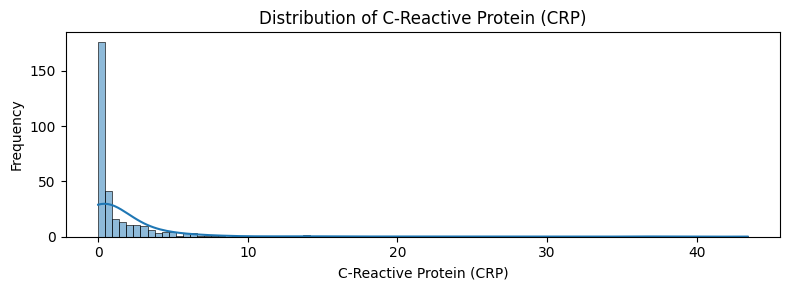

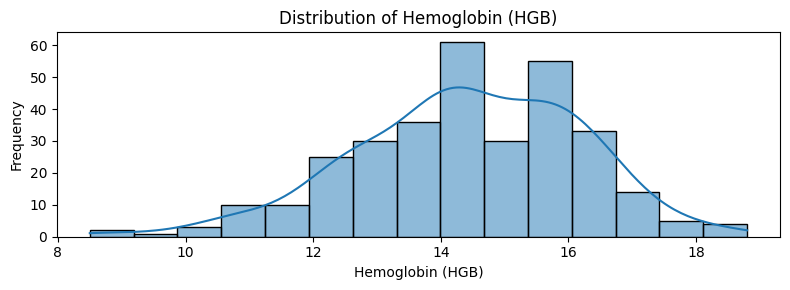

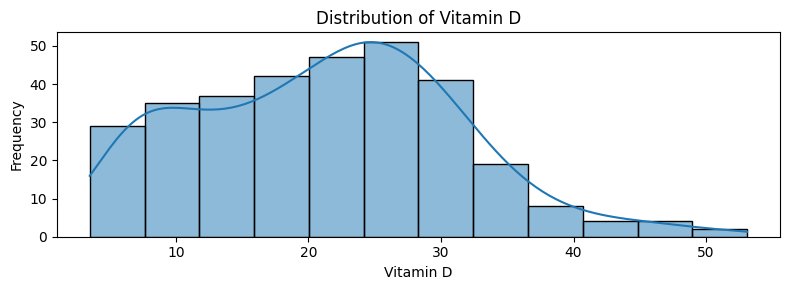

In [10]:
for col in df.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [11]:
gender_value = df.groupby(['Gender', 'Gallstone Status']).size().unstack()

In [12]:
print(gender_value)

Gallstone Status   0   1
Gender                  
0                 94  68
1                 67  90


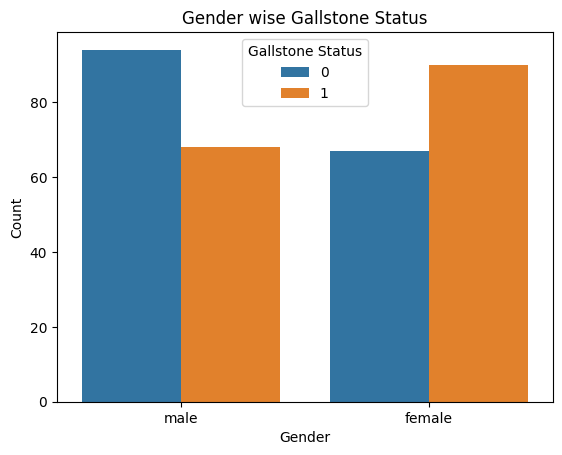

In [13]:
sns.countplot(data=df, x='Gender', hue='Gallstone Status')
plt.title('Gender wise Gallstone Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['male', 'female'])
plt.show()

In [14]:
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


Age

In [15]:
df.groupby('Gallstone Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gallstone Status,,,,,,,,
0,161.0,47.633540,12.969527,20.0,38.00,49.0,56.0,96.0
1,158.0,48.512658,11.200397,20.0,39.25,50.0,56.0,76.0


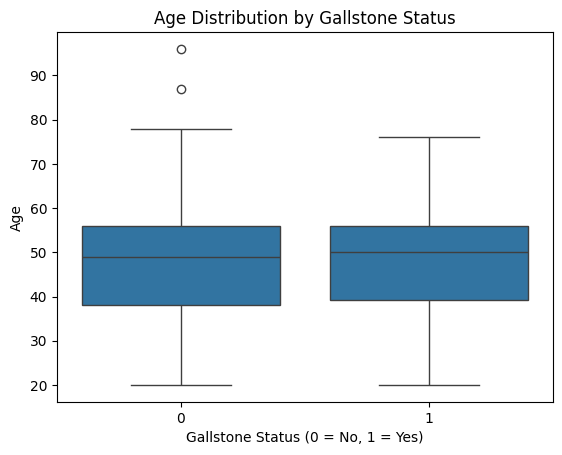

In [16]:
sns.boxplot(data=df, x='Gallstone Status', y='Age')
plt.title('Age Distribution by Gallstone Status')
plt.xlabel('Gallstone Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [17]:
data_gs= df.copy()
data_gs['Age_Group'] = pd.cut(data_gs['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 100], labels=['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'])

# Gallstone rate per age group
age_group_analysis = data_gs.groupby('Age_Group')['Gallstone Status'].mean() * 100
print(age_group_analysis)

Age_Group
<20      25.000000
20-29    33.333333
30-39    50.724638
40-49    50.574713
50-59    52.941176
60-69    48.387097
70+      36.363636
Name: Gallstone Status, dtype: float64


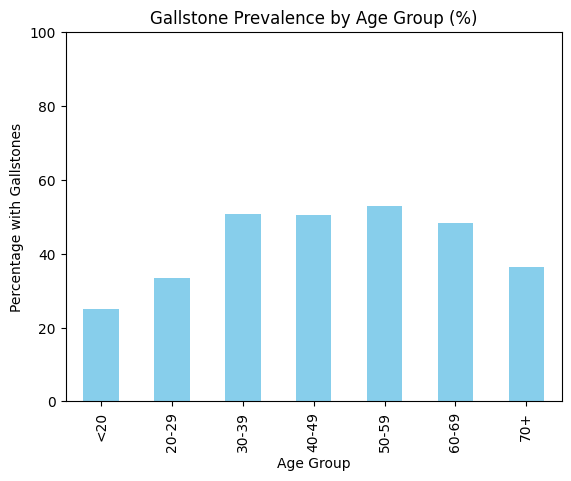

In [18]:
age_group_analysis.plot(kind='bar', color='skyblue')
plt.title('Gallstone Prevalence by Age Group (%)')
plt.ylabel('Percentage with Gallstones')
plt.xlabel('Age Group')
plt.ylim(0, 100)
plt.show()

In [19]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(data_gs['Age_Group'], data_gs['Gallstone Status'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi-square p-value: {p}")


Chi-square p-value: 0.6945119553145893


If p < 0.05: Significant association (age group affects gallstone status).

If p ≥ 0.05: No significant association.

A p-value of 0.69 means: There is no statistically significant association between age and gallstone status.

BMI

In [20]:
data_gs.groupby('Gallstone Status')['Body Mass Index (BMI)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gallstone Status,,,,,,,,
0,161.0,28.238509,5.290523,17.4,24.800,27.70,31.400,49.7
1,158.0,29.527848,5.274610,18.8,26.025,29.15,32.475,48.2


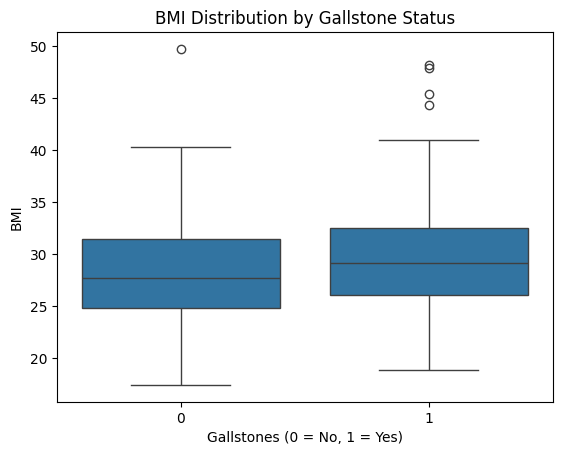

In [21]:
sns.boxplot(data=df, x='Gallstone Status', y='Body Mass Index (BMI)')
plt.title('BMI Distribution by Gallstone Status')
plt.xlabel('Gallstones (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()


In [22]:
data_gs['Gallstone Status'] = data_gs['Gallstone Status'].map({0: 'No', 1: 'Yes'})
print(data_gs['Gallstone Status'].unique())

['No' 'Yes']


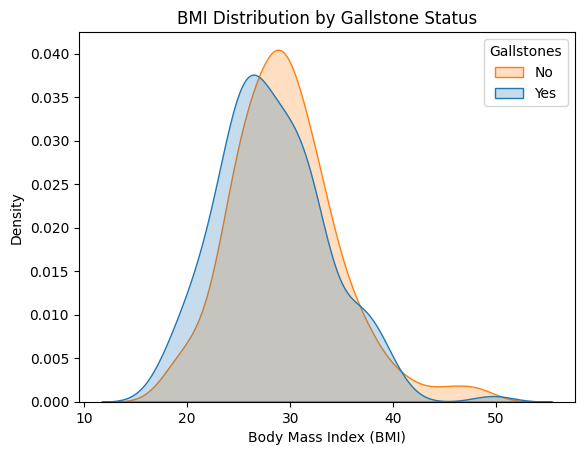

In [23]:
sns.kdeplot(data=data_gs, x='Body Mass Index (BMI)', hue='Gallstone Status', fill=True)
plt.title('BMI Distribution by Gallstone Status')
plt.legend(title='Gallstones', labels=['No', 'Yes'])
plt.show()

In [24]:
from scipy.stats import ttest_ind

bmi_yes = df[df['Gallstone Status'] == 1]['Body Mass Index (BMI)']
bmi_no = df[df['Gallstone Status'] == 0]['Body Mass Index (BMI)']

t_stat, p_val = ttest_ind(bmi_yes, bmi_no)
print(f"T-test p-value: {p_val:.4f}")


T-test p-value: 0.0300


p < 0.05 → Significant difference in BMI between groups.

p ≥ 0.05 → No significant difference.

There is a significant difference in BMI between people with and without gallstones

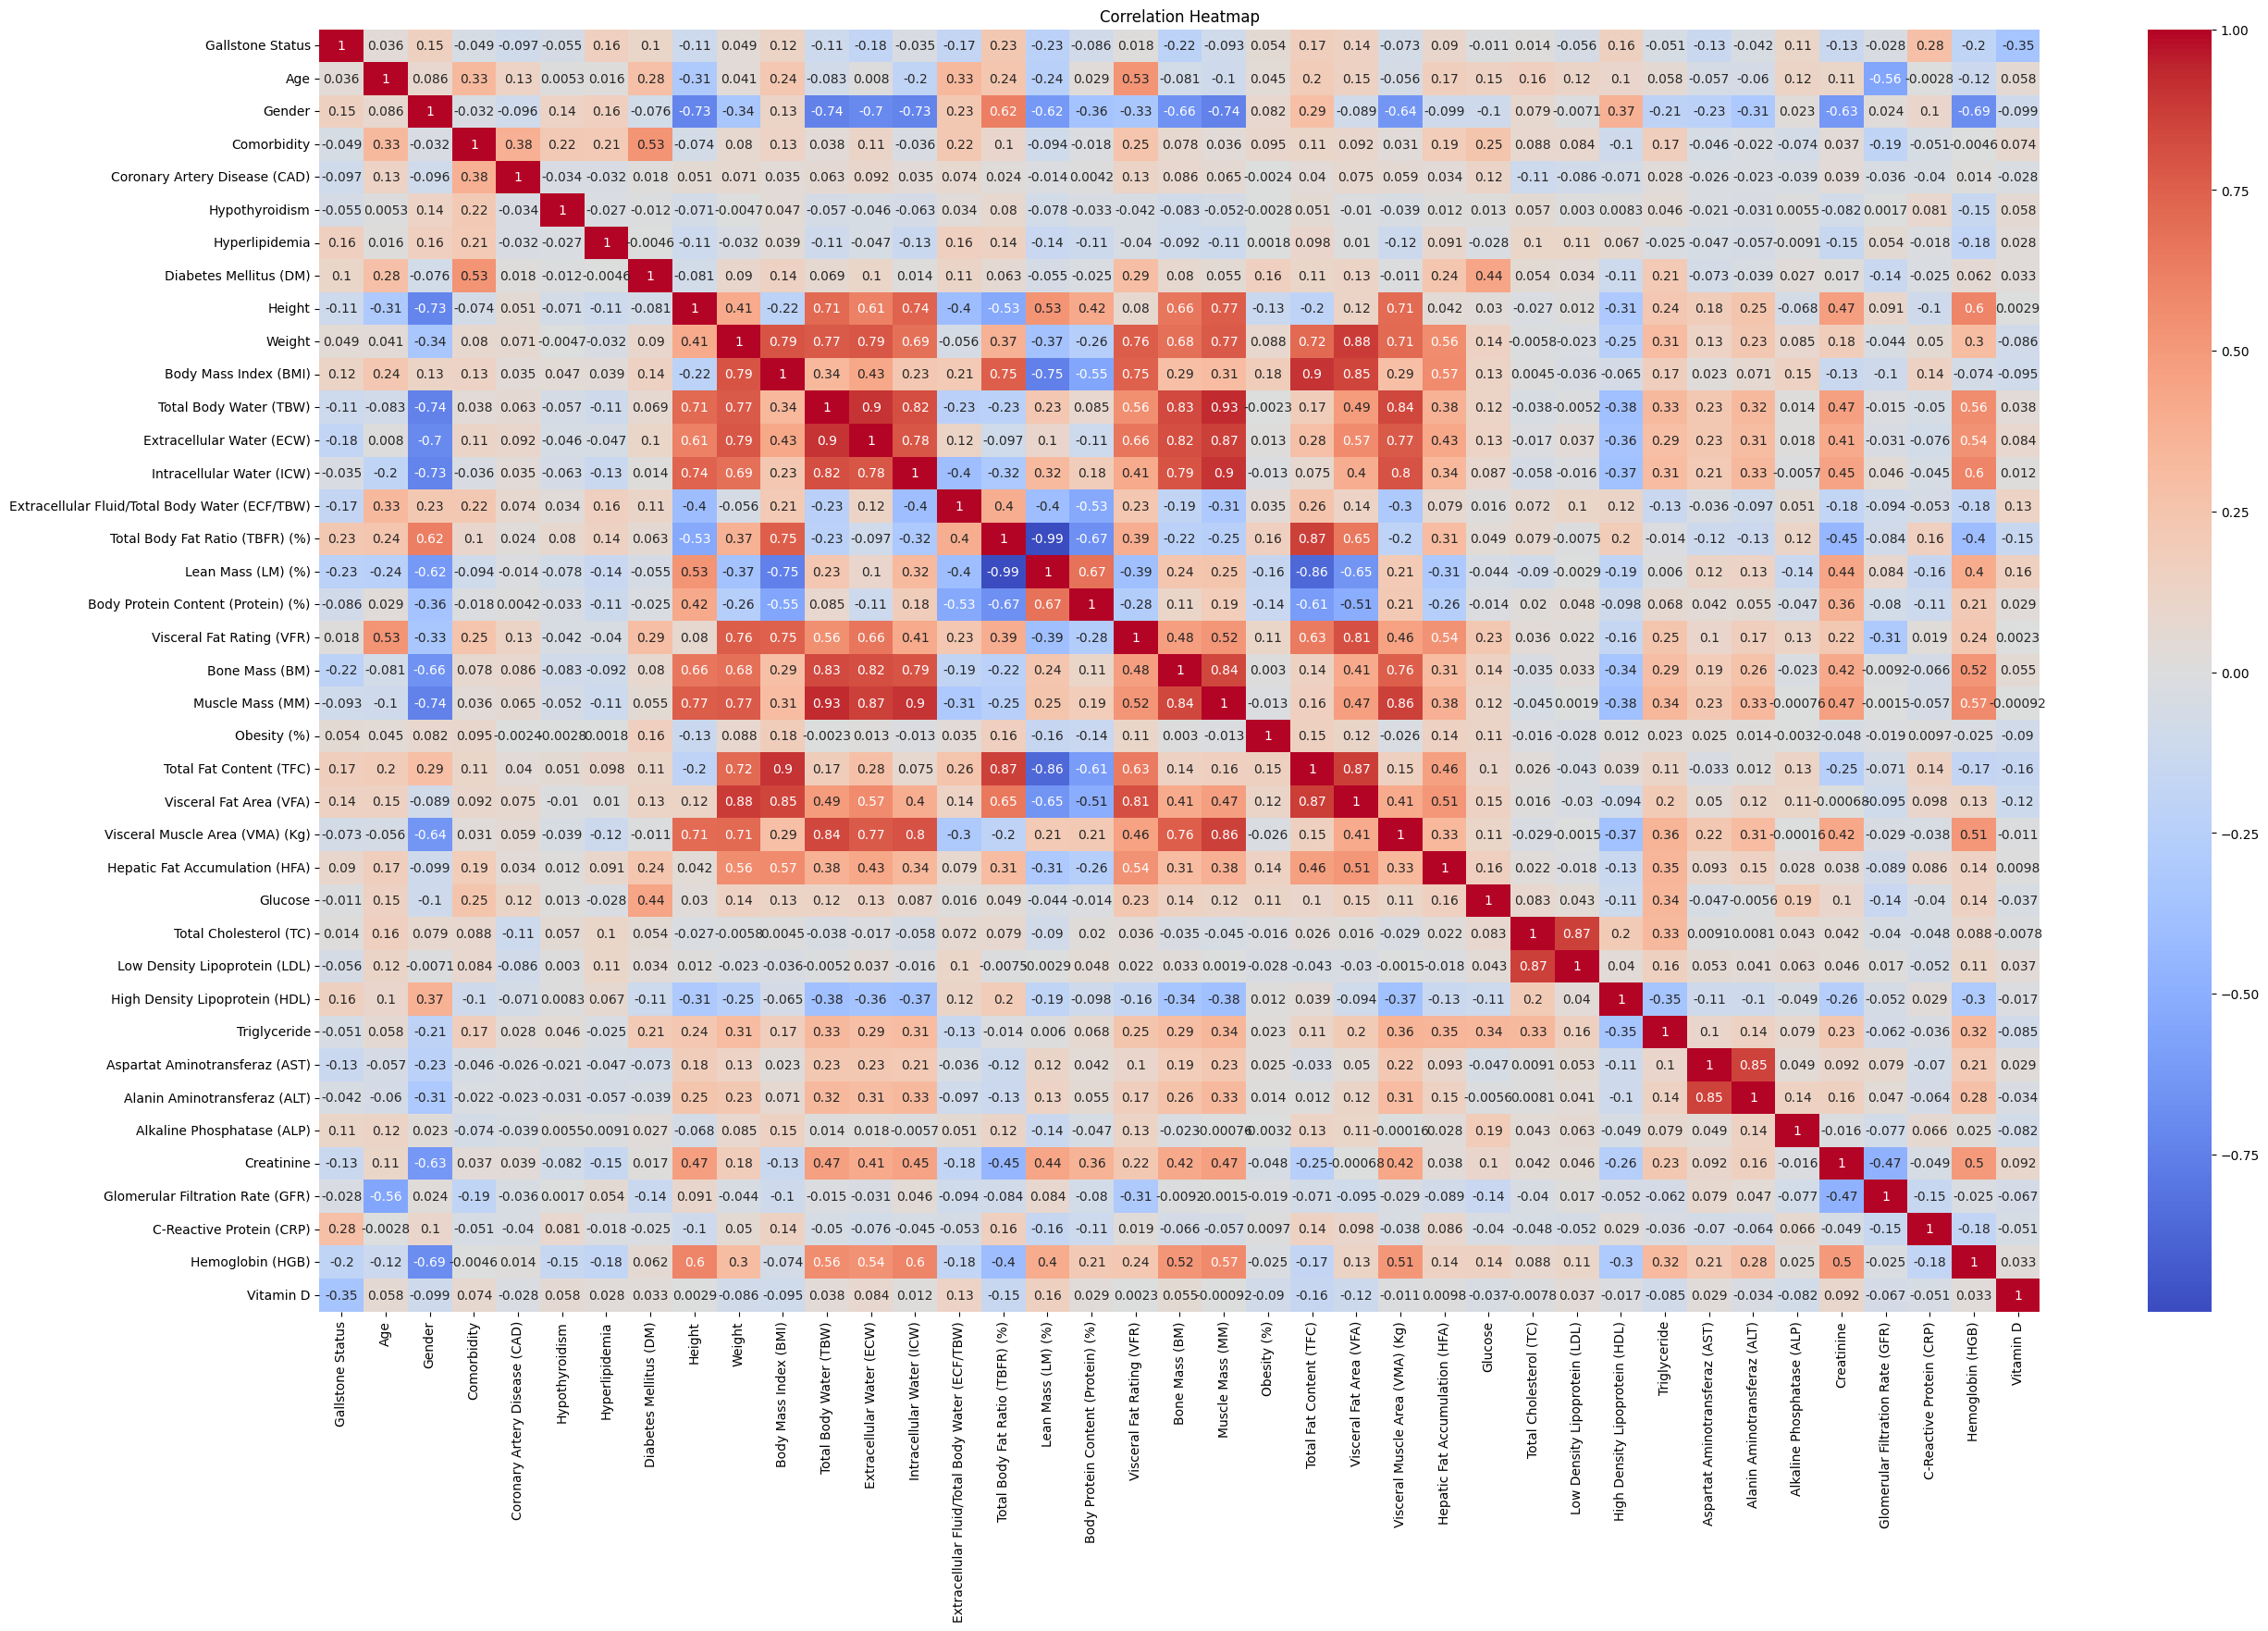

In [25]:
plt.figure(figsize=(30, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df_corr = df.corr()
df_corr.style.background_gradient("coolwarm")

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,Body Mass Index (BMI),Total Body Water (TBW),Extracellular Water (ECW),Intracellular Water (ICW),Extracellular Fluid/Total Body Water (ECF/TBW),Total Body Fat Ratio (TBFR) (%),Lean Mass (LM) (%),Body Protein Content (Protein) (%),Visceral Fat Rating (VFR),Bone Mass (BM),Muscle Mass (MM),Obesity (%),Total Fat Content (TFC),Visceral Fat Area (VFA),Visceral Muscle Area (VMA) (Kg),Hepatic Fat Accumulation (HFA),Glucose,Total Cholesterol (TC),Low Density Lipoprotein (LDL),High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
Gallstone Status,1.000000,0.036339,0.153483,-0.048516,-0.096998,-0.055196,0.161901,0.104689,-0.107919,0.048669,0.121507,-0.111233,-0.178436,-0.035274,-0.169826,0.225470,-0.225749,-0.086424,0.018288,-0.216570,-0.093297,0.053920,0.170158,0.140397,-0.072989,0.090268,-0.011498,0.014100,-0.056469,0.158622,-0.050835,-0.134910,-0.041937,0.109882,-0.132283,-0.028276,0.281995,-0.196872,-0.354873
Age,0.036339,1.000000,0.086144,0.325447,0.129636,0.005289,0.015660,0.279302,-0.307407,0.040579,0.235835,-0.083263,0.008024,-0.198592,0.326685,0.243448,-0.243381,0.029040,0.531991,-0.080666,-0.101157,0.045473,0.195508,0.146932,-0.056233,0.167793,0.148504,0.159005,0.116587,0.103681,0.058043,-0.056930,-0.060163,0.121376,0.106190,-0.555640,-0.002826,-0.121711,0.057599
Gender,0.153483,0.086144,1.000000,-0.032308,-0.095766,0.135212,0.162919,-0.076437,-0.725667,-0.336012,0.125154,-0.740204,-0.698903,-0.733073,0.228835,0.620923,-0.623559,-0.357414,-0.328041,-0.664633,-0.742792,0.082191,0.290962,-0.089010,-0.640871,-0.098564,-0.104411,0.079499,-0.007075,0.370333,-0.209787,-0.228504,-0.310551,0.022681,-0.631499,0.024072,0.104154,-0.688754,-0.099308
Comorbidity,-0.048516,0.325447,-0.032308,1.000000,0.381961,0.219226,0.206355,0.525616,-0.073628,0.079539,0.128748,0.038178,0.113013,-0.035896,0.222294,0.099794,-0.093575,-0.018127,0.253402,0.078123,0.036220,0.095022,0.111799,0.091739,0.030590,0.188801,0.248475,0.087541,0.083620,-0.102534,0.172306,-0.045610,-0.021705,-0.073663,0.036678,-0.192767,-0.051218,-0.004605,0.074296
Coronary Artery Disease (CAD),-0.096998,0.129636,-0.095766,0.381961,1.000000,-0.033687,-0.031709,0.018451,0.051080,0.070927,0.035013,0.063354,0.091571,0.034815,0.074182,0.023606,-0.014157,0.004200,0.125916,0.086173,0.064929,-0.002448,0.039755,0.075075,0.058588,0.034186,0.118010,-0.111411,-0.085557,-0.071437,0.027974,-0.025911,-0.023239,-0.039137,0.038596,-0.036410,-0.039971,0.013770,-0.028182
Hypothyroidism,-0.055196,0.005289,0.135212,0.219226,-0.033687,1.000000,-0.027328,-0.011817,-0.070563,-0.004688,0.046768,-0.057123,-0.046420,-0.063132,0.034082,0.079524,-0.078081,-0.033130,-0.042477,-0.082984,-0.051782,-0.002806,0.050939,-0.010105,-0.039241,0.011560,0.013446,0.056996,0.003015,0.008262,0.046188,-0.020628,-0.031078,0.005479,-0.082271,0.001743,0.081460,-0.146965,0.057859
Hyperlipidemia,0.161901,0.015660,0.162919,0.206355,-0.031709,-0.027328,1.000000,-0.004601,-0.106368,-0.031597,0.038858,-0.105592,-0.047434,-0.132039,0.162791,0.141721,-0.140231,-0.114819,-0.039983,-0.091688,-0.107339,0.001810,0.098224,0.010025,-0.118602,0.090923,-0.027539,0.104894,0.108773,0.067083,-0.024615,-0.047476,-0.057498,-0.009051,-0.151923,0.054494,-0.018193,-0.182561,0.028342
Diabetes Mellitus (DM),0.104689,0.279302,-0.076437,0.525616,0.018451,-0.011817,-0.004601,1.000000,-0.081155,0.089725,0.144444,0.068894,0.104503,0.014295,0.112957,0.062750,-0.055031,-0.025276,0.292057,0.080457,0.055194,0.164420,0.110358,0.125796,-0.010817,0.238952,0.442663,0.053586,0.034338,-0.107639,0.208226,-0.073480,-0.038840,0.027056,0.016869,-0.137200,-0.024646,0.061703,0.032730
Height,-0.107919,-0.307407,-0.725667,-0.073628,0.051080,-0.070563,-0.106368,-0.081155,1.000